<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
dane = pd.read_csv("/tested[1].csv")
dane = dane.drop(columns=[ "PassengerId",'Name', "Ticket", "Cabin", 'Embarked'])
dane = dane.dropna()
dane = pd.get_dummies(dane, columns=['Sex'], dtype=float)
dane = pd.DataFrame(dane)

dane.head()

dane2 = pd.read_csv("/ex2data1[1].csv")
dane2.head()

,x,y,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
X = dane.iloc[:, :-1]
y = dane.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)
print(X_test)

X2 = dane2.iloc[:, :-1]
y2= dane2.iloc[:, -1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_train, y2_train, test_size=0.25)


     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female
387         0       2  57.0      0      0  13.0000         0.0
113         1       3  18.5      0      0   7.2833         1.0
337         0       3  39.0      0      2   7.2292         0.0
136         0       3  26.5      0      0   7.2250         0.0
280         1       3  23.0      0      0   8.6625         1.0
..        ...     ...   ...    ...    ...      ...         ...
61          0       2  32.0      0      0  13.5000         0.0
11          0       1  46.0      0      0  26.0000         0.0
320         0       3  26.0      0      0   7.7750         0.0
66          1       3  18.0      0      0   7.8792         1.0
95          0       3  25.0      0      0   7.7958         0.0

[83 rows x 7 columns]


In [98]:
test_set = pd.DataFrame(X_test, y_test)
train_set = pd.DataFrame(X_train, y_train)
valid_set = pd.DataFrame(X_valid, y_valid)
log_r = LogisticRegression(max_iter=2000)
log_r.fit(X_train, y_train)

log_r2 = LogisticRegression(max_iter=2000)
log_r2.fit(X2_train, y2_train)

LogisticRegression(max_iter=2000)

[[20  0]
 [ 0 42]]
20 0 0 42
[6.12354858e-04 7.17639185e-01 9.93565714e-01 4.37667500e-01
 3.96256003e-01 5.96068516e-01 1.38411278e-01 8.56218174e-01
 6.43744538e-01 9.98658253e-01 2.01033168e-01 9.93411579e-01
 9.99624791e-01 7.46030756e-02 9.98797040e-01 9.96439248e-01
 1.77323235e-02 9.96898991e-01 1.16282915e-01]


'\nplt.plot(fp_rate, tp_rate)\nplt.ylabel(\'True Positive Rate\')\nplt.xlabel(\'False Positive Rate\')\nplt.title("Krzywa ROC dla najlepszego modelu")\nplt.show()'

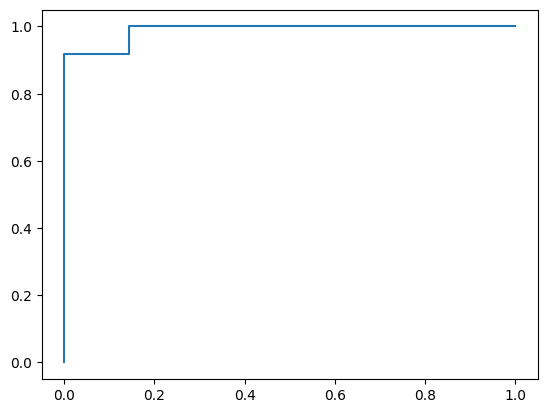

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
predicted_classes_logistic = log_r.predict(X_valid)
pred1 = log_r.predict_proba(X_valid)
pred2 = log_r2.predict_proba(X2_valid)

print(confusion_matrix(y_valid, predicted_classes_logistic))
mac_pom = confusion_matrix(y_valid, predicted_classes_logistic)
tp, fp, fn, tn = mac_pom.ravel()
print(tp, fp, fn, tn)

fpr, tpr, thresholds = roc_curve(y2_valid, pred2[:,1], pos_label=1)
plt.plot(fpr,tpr,label="Tree, AUC="+str(round(roc_auc_score(y2_valid, pred2[:,1]), 4)))
print(pred2[:,1])
'''
plt.plot(fp_rate, tp_rate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Krzywa ROC dla najlepszego modelu")
plt.show()'''